In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [24]:
# Load the dataset (assuming you have it in a CSV file)
data = pd.read_csv('car_data.csv')

In [25]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine_Size_Liters', 'Fuel_Efficiency_MPG',
       'Mileage', 'Horsepower', 'Transmission', 'Fuel_Type', 'Color',
       'Price_USD', 'Condition', 'Drivetrain', 'Num_Owners', 'Features',
       'Safety_Rating', 'Warranty_Years', 'Market_Price', 'Dealer_Name',
       'Location', 'Seller_Type', 'Rating', 'Car_Size', 'Screen_Resolution'],
      dtype='object')

In [26]:
# Drop the 'Market_Price' column and use it as the target variable
target = data['Market_Price']
data = data.drop(columns=['Market_Price'])

In [27]:
# Extract the features (columns) you want to apply PCA to
features = data[['Make', 'Model', 'Year', 'Engine_Size_Liters', 'Fuel_Efficiency_MPG',
       'Mileage', 'Horsepower', 'Transmission', 'Fuel_Type', 'Color',
       'Price_USD', 'Condition', 'Drivetrain', 'Num_Owners', 'Features',
       'Safety_Rating', 'Warranty_Years', 'Dealer_Name',
       'Location', 'Seller_Type', 'Rating', 'Car_Size', 'Screen_Resolution']]

In [28]:
# Select only the numeric columns for PCA
numeric_features = data.select_dtypes(include=[np.number])

# Standardize the numeric features (mean = 0, variance = 1)
scaler = StandardScaler()
numeric_features_std = scaler.fit_transform(numeric_features)

In [29]:
# Initialize PCA with 8 components
n_components = 8
pca = PCA(n_components=n_components)

In [30]:
# Apply PCA to the standardized features
principal_components = pca.fit_transform(numeric_features_std)


In [31]:
component_means = principal_components.mean(axis=0)
print("Means of Principal Components:", component_means)


Means of Principal Components: [ 4.44089210e-17  2.66453526e-17  1.77635684e-17 -3.33066907e-17
  4.44089210e-18  7.10542736e-17 -4.44089210e-18  5.32907052e-17]


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, target, test_size=0.2, random_state=0)

In [33]:
# Create a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [34]:
# Train the regressor on the training data
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [35]:
# Predict 'Market_Price' on the test set
y_pred = regressor.predict(X_test)

In [36]:
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 14421.504500000001


In [37]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.13432007 0.12239241 0.11408076 0.10887312 0.10306584 0.09946386
 0.09285067 0.07797298]


In [38]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Variance:", cumulative_variance)


Cumulative Variance: [0.13432007 0.25671248 0.37079323 0.47966636 0.5827322  0.68219606
 0.77504673 0.85301971]


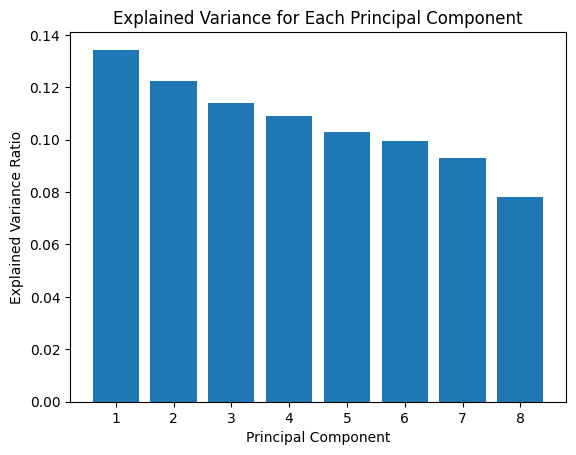

In [39]:
# Plot the explained variance ratio
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')
plt.show()